## classification model 



**Dataset**: 
   - **E-Commerce Shipping Data.**
   - **Contains Cleaned 10999 observations of 12 variables.**

   
**Steps**: 

1. **Prepare the data**
   - **Clean and Inspect the data**
   - **Preprocess the data**: Encoding - scale
   - **Split the data into training and testing**

2. **Train the models**
   - **Logistic Regression**
   - **Random Forest**
   - **Support Vector Machine**


3. **Evaluate the model**
   - **GridSearchCV**
   - **metrics**

      - **Accuracy: Overall accuracy of the model on the test set.**
      - **Classification Report: Precision, recall, and F1-score for each class.**
      - **Confusion Matrix: How well the model's predictions match the actual labels (useful for understanding misclassifications).**
      - **Feature Importances**

hyperparameter is a parameter that is set before training a machine learning model.
tuned using techniques like grid search

In [ ]:
pip install pandas scikit-learn seaborn

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Logistic Regression Model and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Random Forest Model and Evaluation
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# SVM Model and Evaluation
from sklearn.svm import SVC

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Read Dataset
df = pd.read_csv('C:/Users/x-shashehri/Downloads/Train.csv')
df.head()

1. **Prepare the data**

In [ ]:
#Inspect The Data
df.info()
df.describe()

In [ ]:
# List of columns i want to keep 
columns_to_keep = ['Warehouse_block', 'Mode_of_Shipment', 'Weight_in_gms', 
                   'Product_importance', 'Discount_offered', 'Cost_of_the_Product', 
                   'Reached.on.Time_Y.N']

# Create a new DataFrame with only the selected columns
df_ = df[columns_to_keep]
df_.head()

In [ ]:
#Preprocess the data (Encoding)

# One-Hot Encoding for multi-category columns
df_ = pd.get_dummies(df_, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance'], drop_first=True)
df_.head()


In [ ]:
#Preprocess the data (scale) 

# Define numerical features that need scaling
numerical_features = ['Weight_in_gms', 'Discount_offered','Cost_of_the_Product']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
df_[numerical_features] = scaler.fit_transform(df_[numerical_features])


df_.head()


In [26]:
#Split the data into training and testing

# Define features (X) and target variable (y)
X = df_.drop('Reached.on.Time_Y.N', axis=1)  # All columns except the target
y = df_['Reached.on.Time_Y.N']  # Target variable

# Split the data into training (80%) and testing (20%) sets 
# ********************** put it in a pickle **********************
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. **Train and evaluate the models**

In [ ]:
# Define Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Define the hyperparameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10],  
    'solver': ['liblinear', 'saga'],  # Solvers to use for optimization
    'penalty': ['l2'],  # L2 regularization (use L1 for sparsity)
}


In [ ]:
# Initialize GridSearchCV for Logistic Regression
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, 
                                   cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSearchCV
grid_search_log_reg.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best Hyperparameters for Logistic Regression: {grid_search_log_reg.best_params_}")

# Use the best model to make predictions
best_log_reg_model = grid_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg_model.predict(X_test)

In [ ]:
#3- Evaluate the Model 
# accuracy
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

In [ ]:
# Define Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}


In [ ]:
# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                              cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best Hyperparameters for Random Forest: {grid_search_rf.best_params_}")

# Use the best model to make predictions
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)



In [12]:
# Random Forest
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#import seaborn as sns
#import matplotlib.pyplot as plt

# Training the Random Forest Model 

# Initialize the Random Forest model with default parameters
#rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model
#rf_model.fit(X_train, y_train)





RandomForestClassifier(n_jobs=-1, random_state=42)

In [13]:
# Making Predictions

#y_pred_rf = rf_model.predict(X_test)


In [ ]:
#  Evaluate the Model 

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix:\n{conf_matrix_rf}")

# Classification Report (precision, recall, f1-score)
class_report_rf = classification_report(y_test, y_pred_rf)
print(f"Classification Report:\n{class_report_rf}")

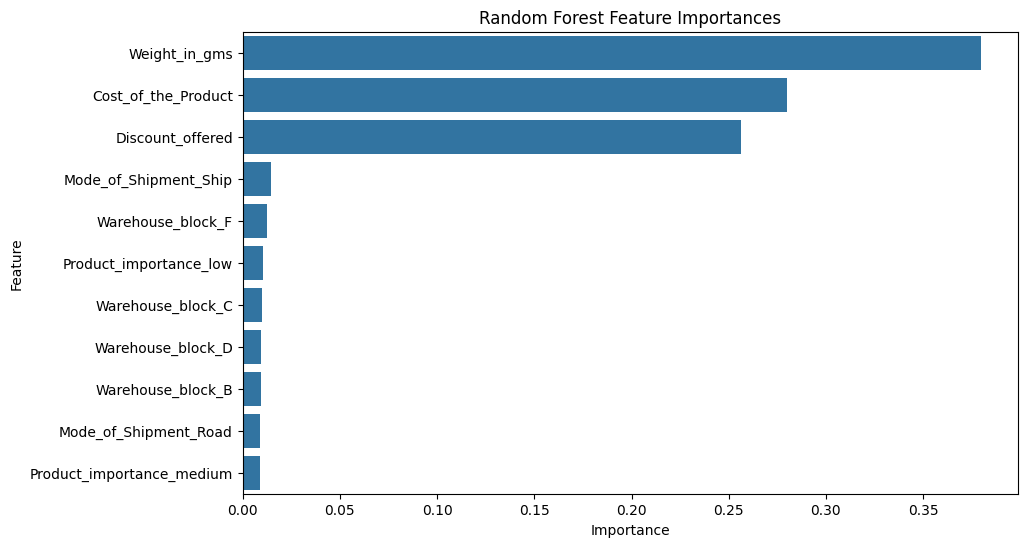

In [15]:
# --- Feature Importances for Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for the feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Random Forest Feature Importances')
plt.show()

In [ ]:
# Define SVM model
svm_model = SVC(random_state=42)

# Define the hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type: linear or radial basis function
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' kernel
}


In [ ]:
# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, 
                               cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSearchCV
grid_search_svm.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best Hyperparameters for SVM: {grid_search_svm.best_params_}")

# Use the best model to make predictions
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)




In [27]:
# Support Vector Machine model  
#svm = SVC(kernel='rbf', random_state=42)


In [28]:
# Train the model
#svm.fit(X_train, y_train)


SVC(random_state=42)

In [29]:
# Making Predictions
#y_pred = svm.predict(X_test)

In [43]:
# Evaluate the model
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy * 100:.2f}%")


# 2. Classification report (includes precision, recall, F1-score, etc.)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 68.73%

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.86      0.69       895
           1       0.86      0.57      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.72      0.71      0.69      2200
weighted avg       0.74      0.69      0.69      2200


Confusion Matrix:
[[773 122]
 [566 739]]
